In [1]:
import cv2 as cv
import numpy as np
import math
from matplotlib import pyplot as plt
from pylab import rcParams

In [2]:
rcParams['figure.figsize'] = 18, 36

In [3]:
from ImageHandler import *
from ImageProcessing import *
from Processing import *

Found 387 components with height 15.700258397932817 in image


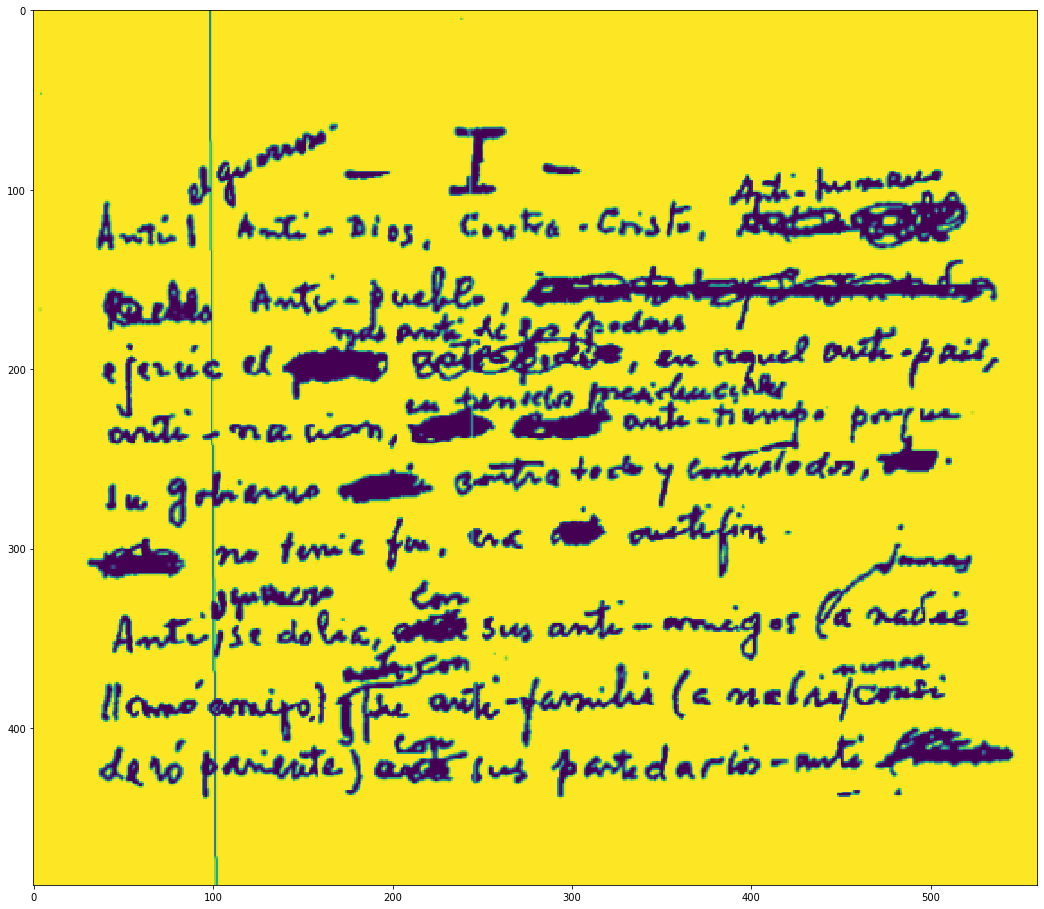

In [56]:
image = cv.imread(cv.samples.findFile("Test-data/test.png"), 0);
(h, w) = np.shape(image);
plt.imshow(image)
width = int (findComponents(image));

In [57]:
# replace pixel with avg gray value 
def PPA(image, width):
    stripped_image, strips = putGLM(np.copy(image), width);
    plt.imshow(stripped_image);
    plt.show();
    
    # apply otsu's algo
    th = np.copy(stripped_image);
    for i in range(strips):
        l = i * width;
        r = (i+1) * width if (((i+1) * width) < w) else w
        _,th[:,l:r] = cv.threshold(stripped_image[:,l:r],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    plt.imshow(th);
    plt.show();
    
    filteredWImage = filterWhite(np.copy(th), strips, width)
    Wheight = avgWhiteH(np.copy(th), strips, width)
    plt.imshow(filteredWImage);
    plt.show();
    
    filteredBImage = filterBlack(np.copy(filteredWImage), strips, width)
    plt.imshow(filteredBImage);
    plt.show();
    
    mode = modeWhite(np.copy(filteredBImage), strips, width);
    return mode, filteredBImage, strips, Wheight;

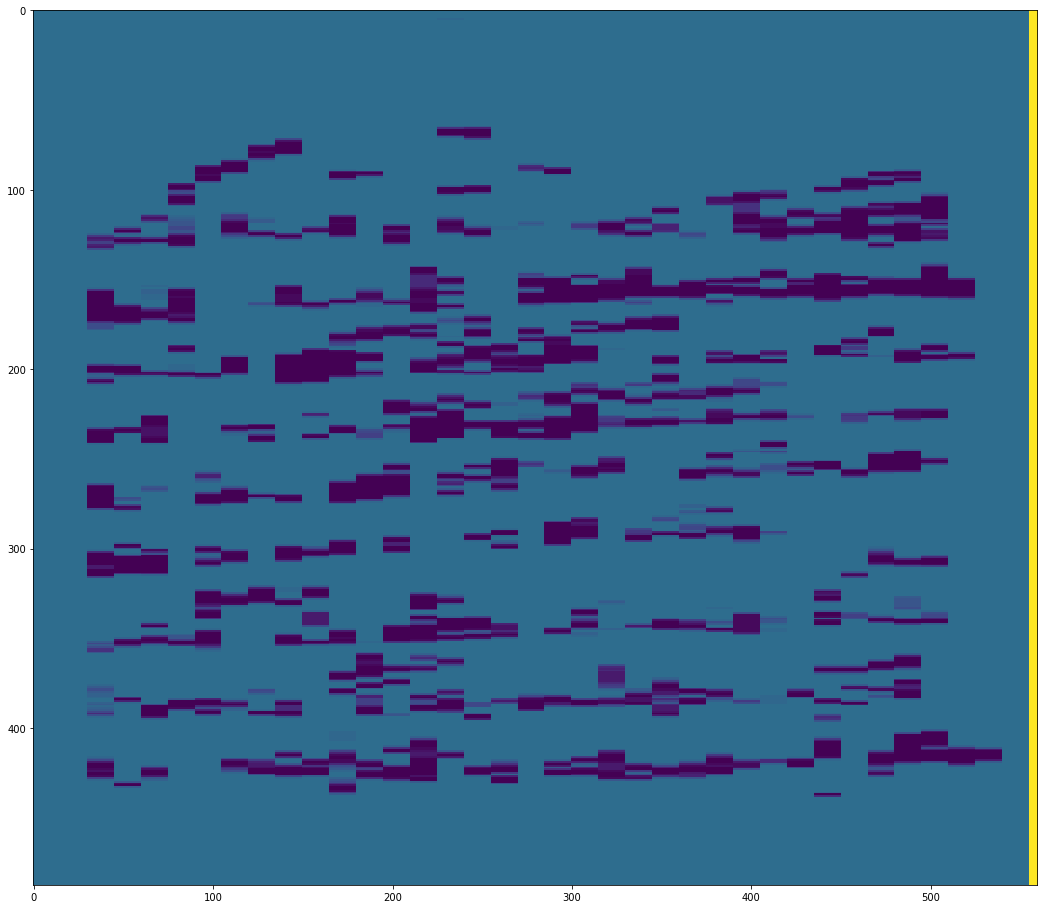

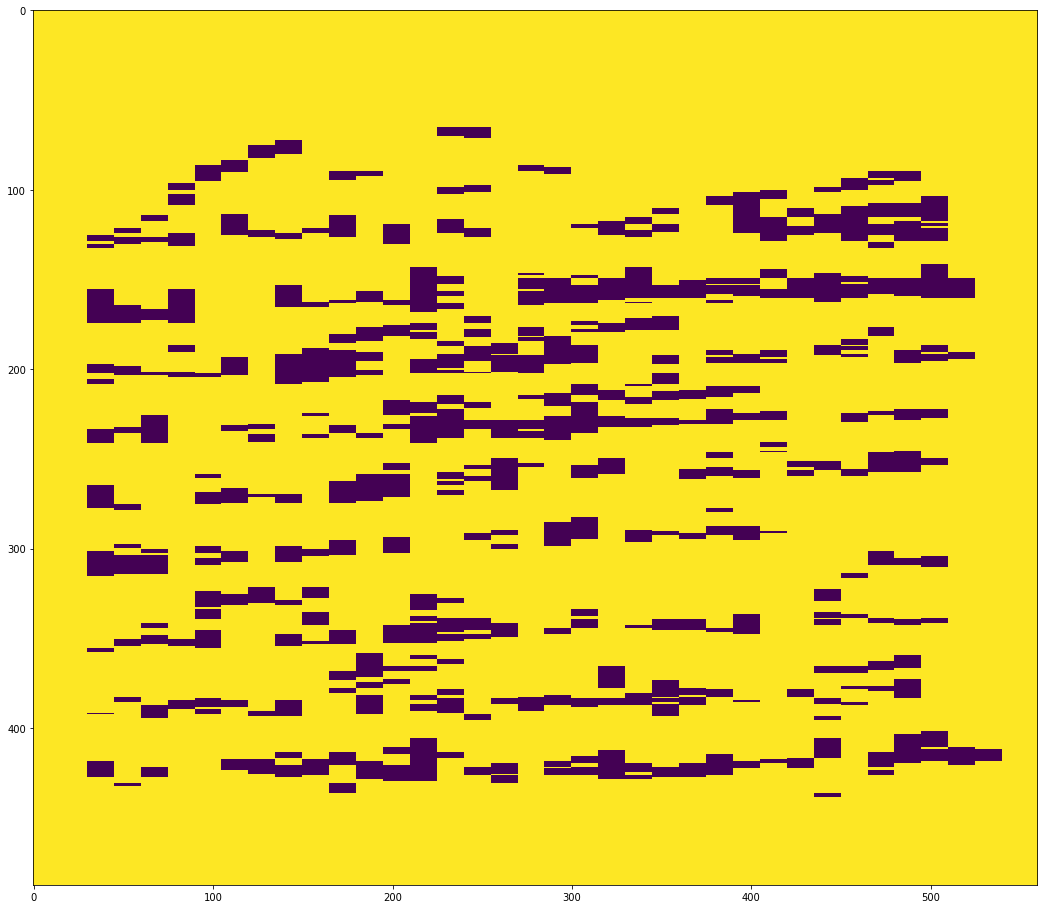

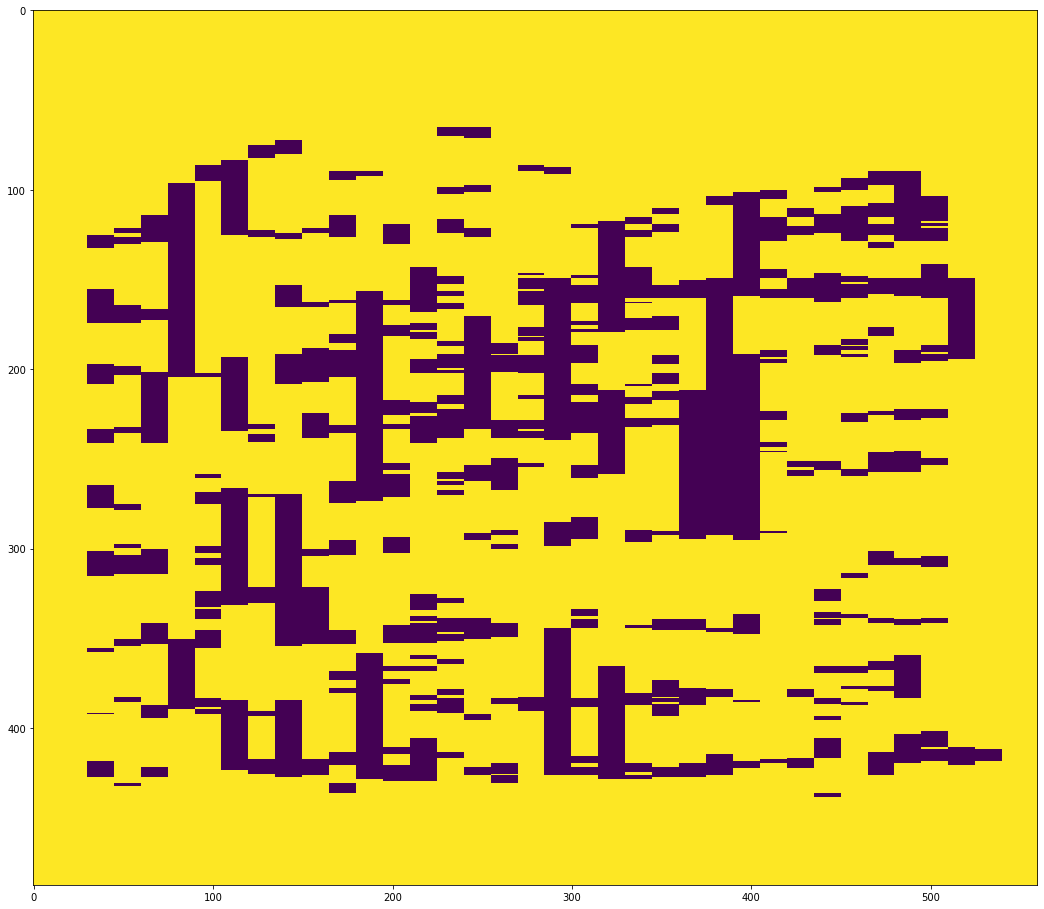

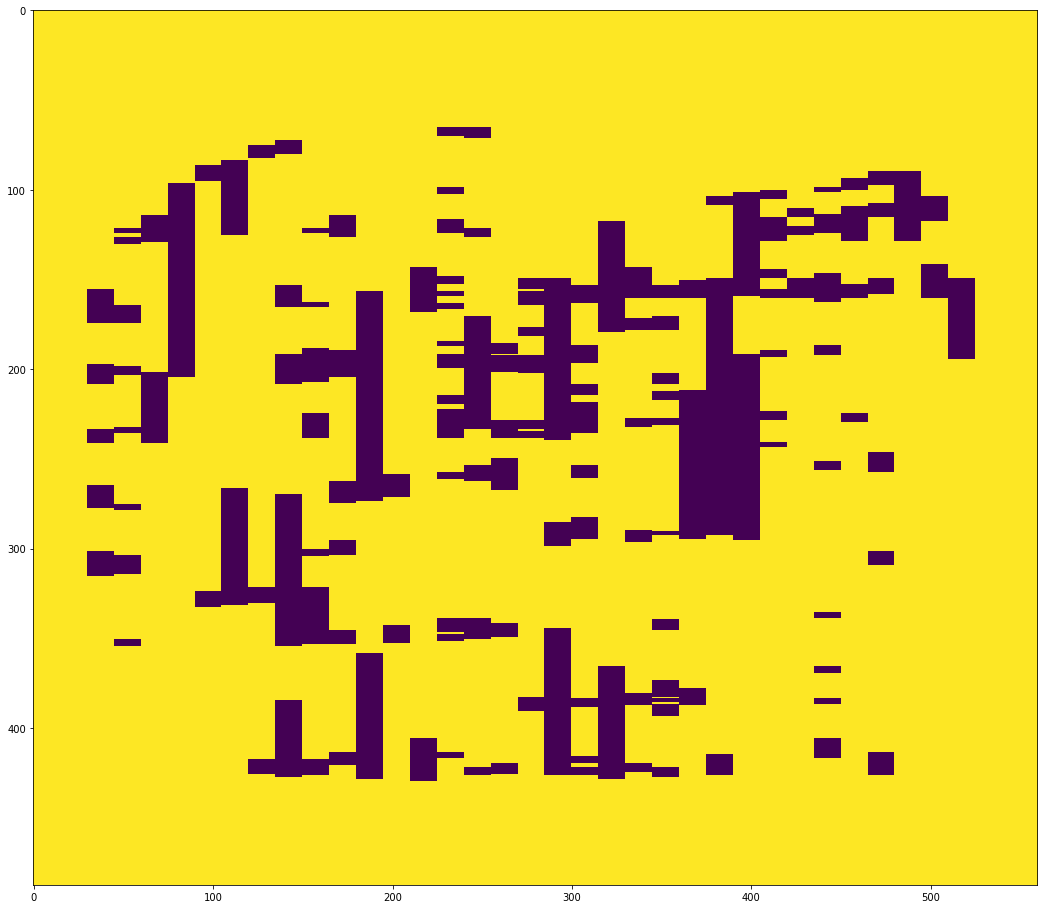

In [58]:
new_width, filteredBImage, strips, height = PPA(image, width)

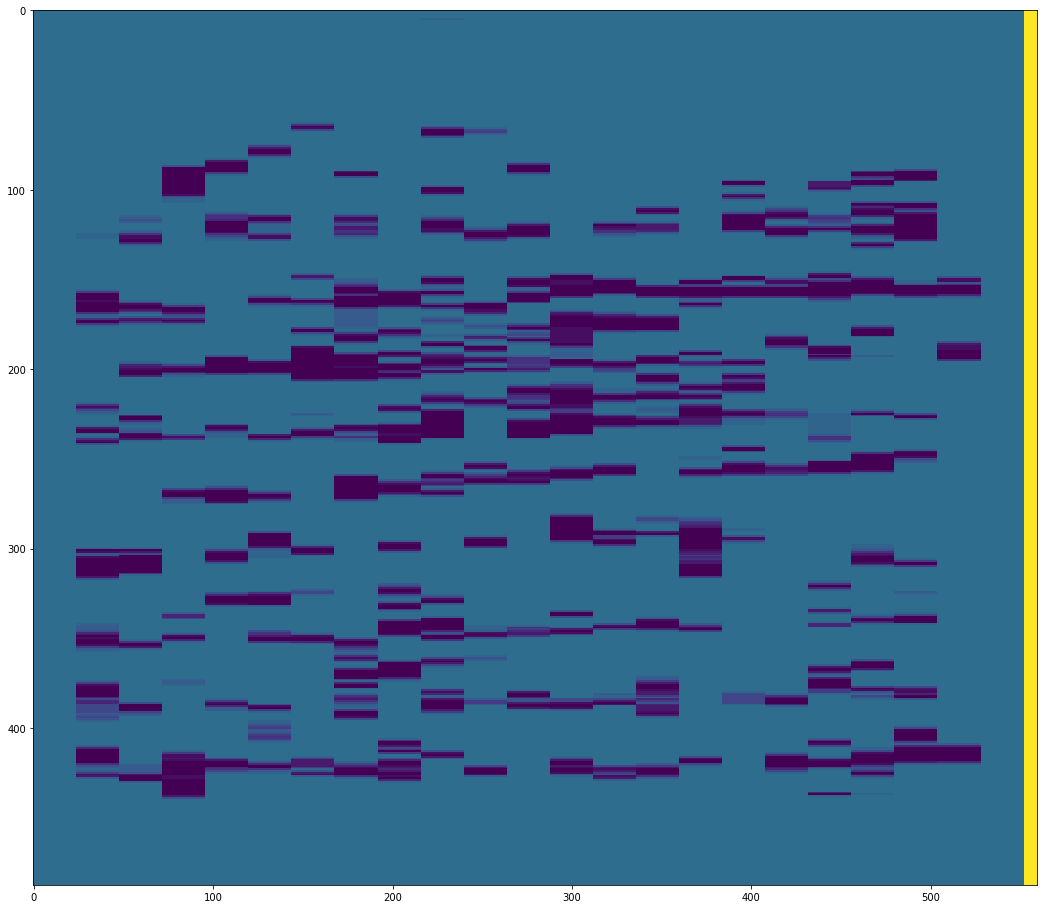

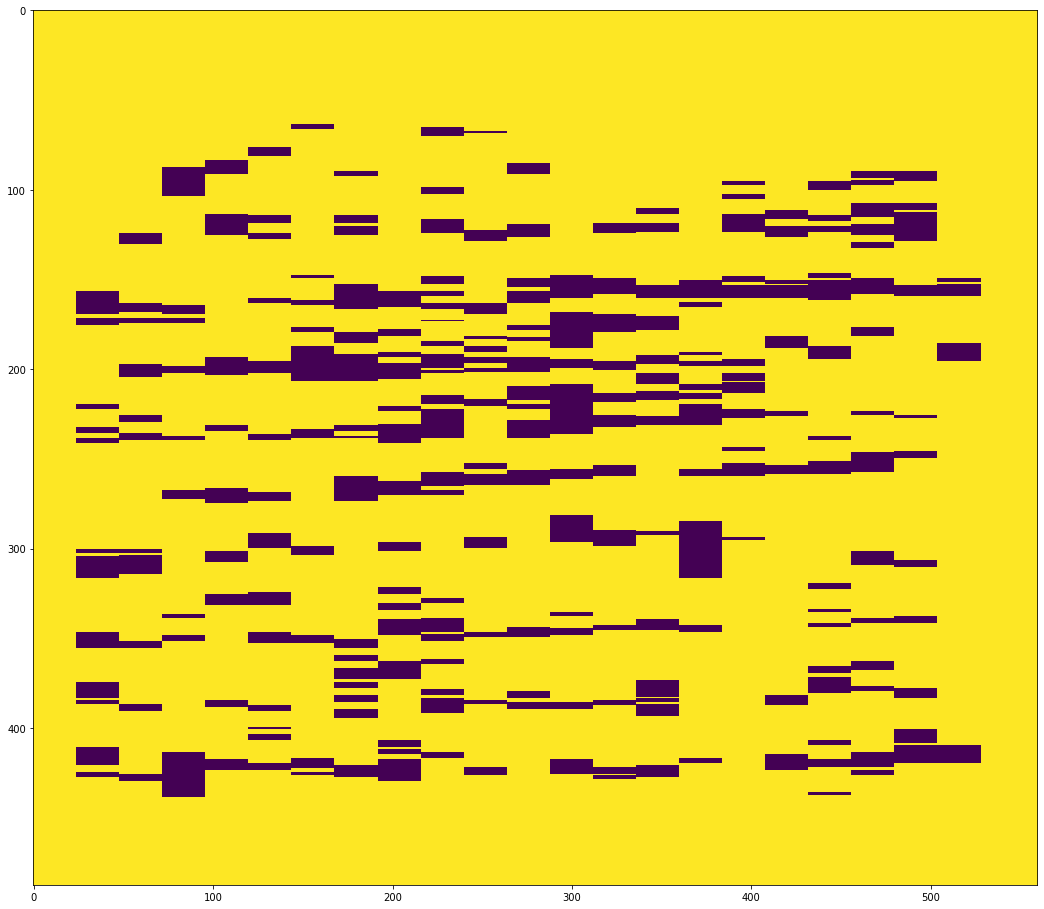

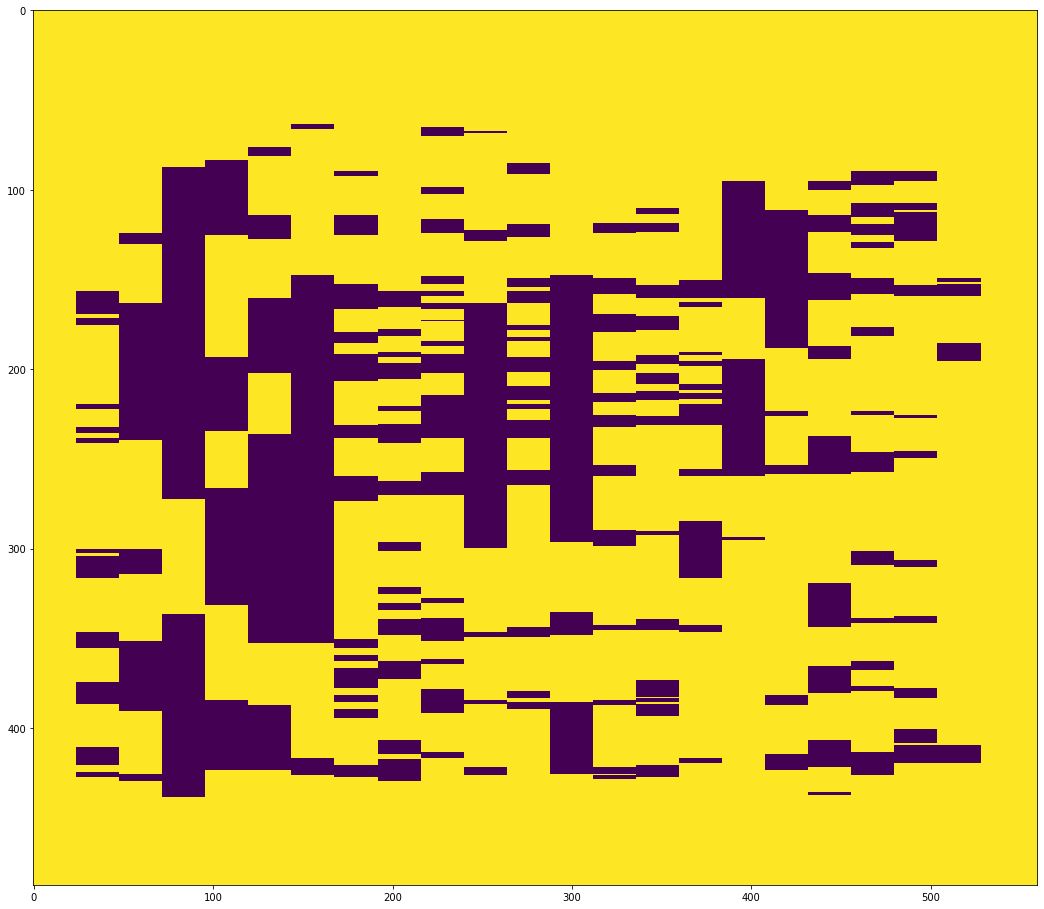

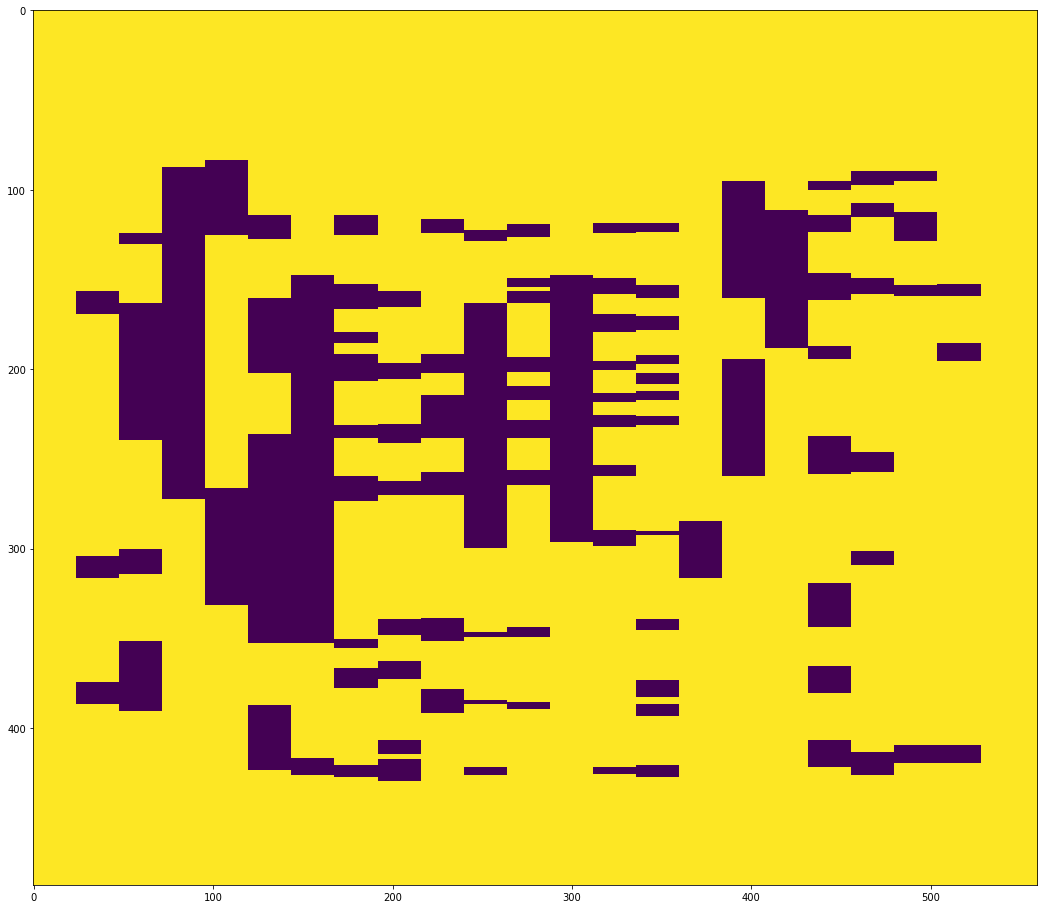

In [59]:
mode, filteredBImage, strips, height = PPA(image, new_width)

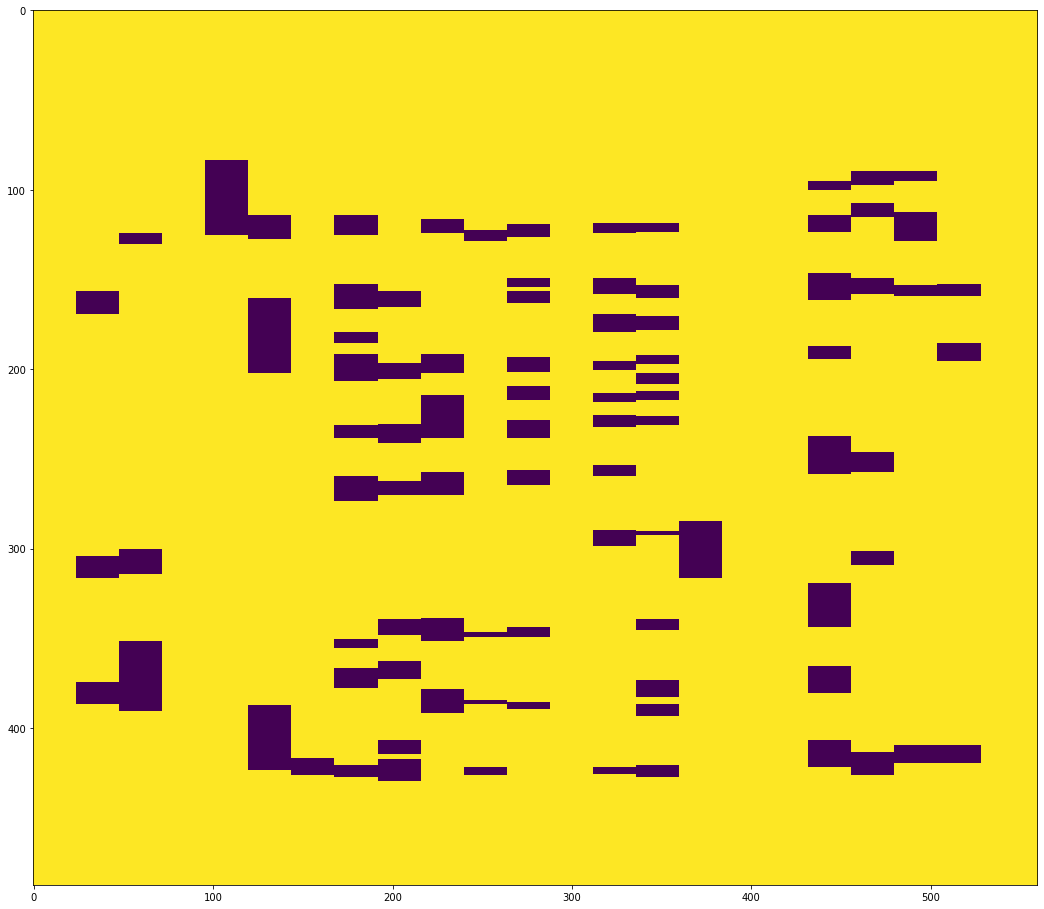

In [60]:
# Remove black block equal or greater than twice of avg
avgBH = removeBlack(np.copy(filteredBImage), strips, new_width);
plt.imshow(avgBH)

In [61]:
# Invert image and then dilate and invert it back
img = [];
for row in avgBH:
    rows = [];
    for ele in row:
        if (ele == 255):
            rows.append(0);
        else:
            rows.append(255);
    img.append(rows);
img = np.array(img, dtype = np.uint8)

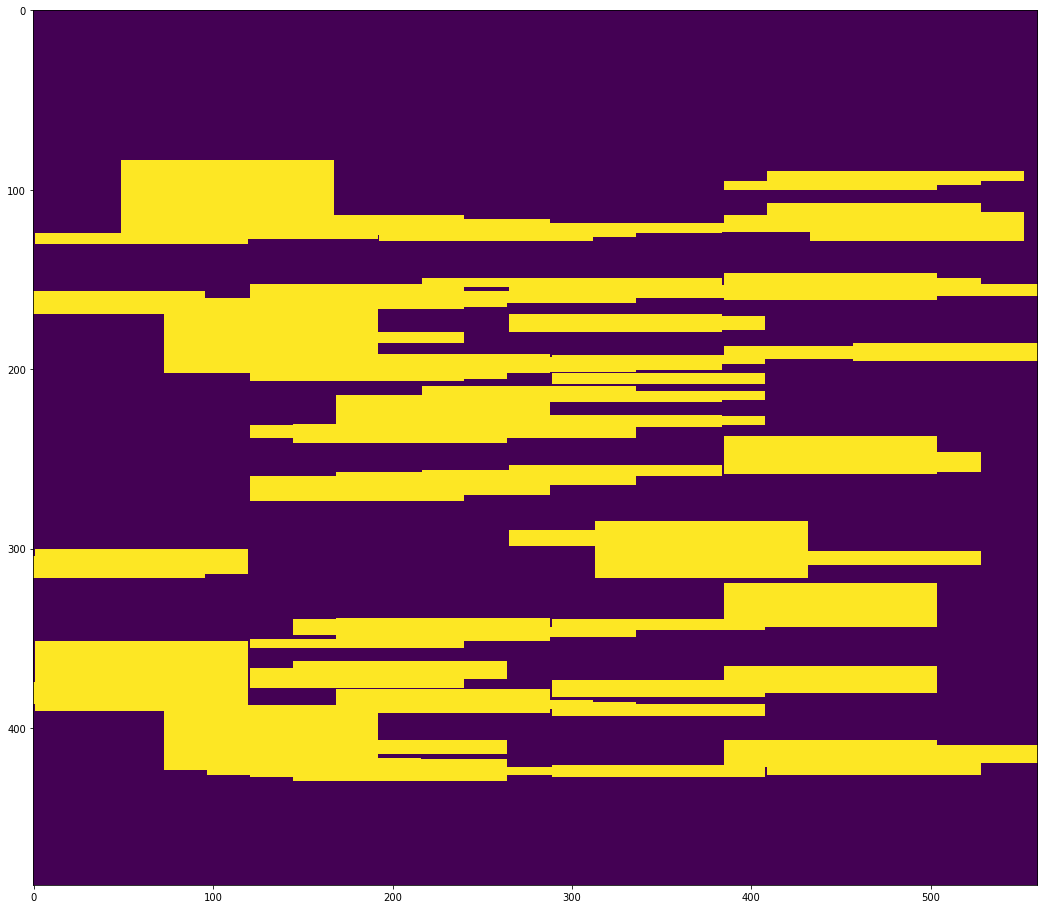

In [62]:
dilated_img = cv.dilate(img, np.ones((1,4* new_width),np.uint8), iterations=1)
plt.imshow(dilated_img);

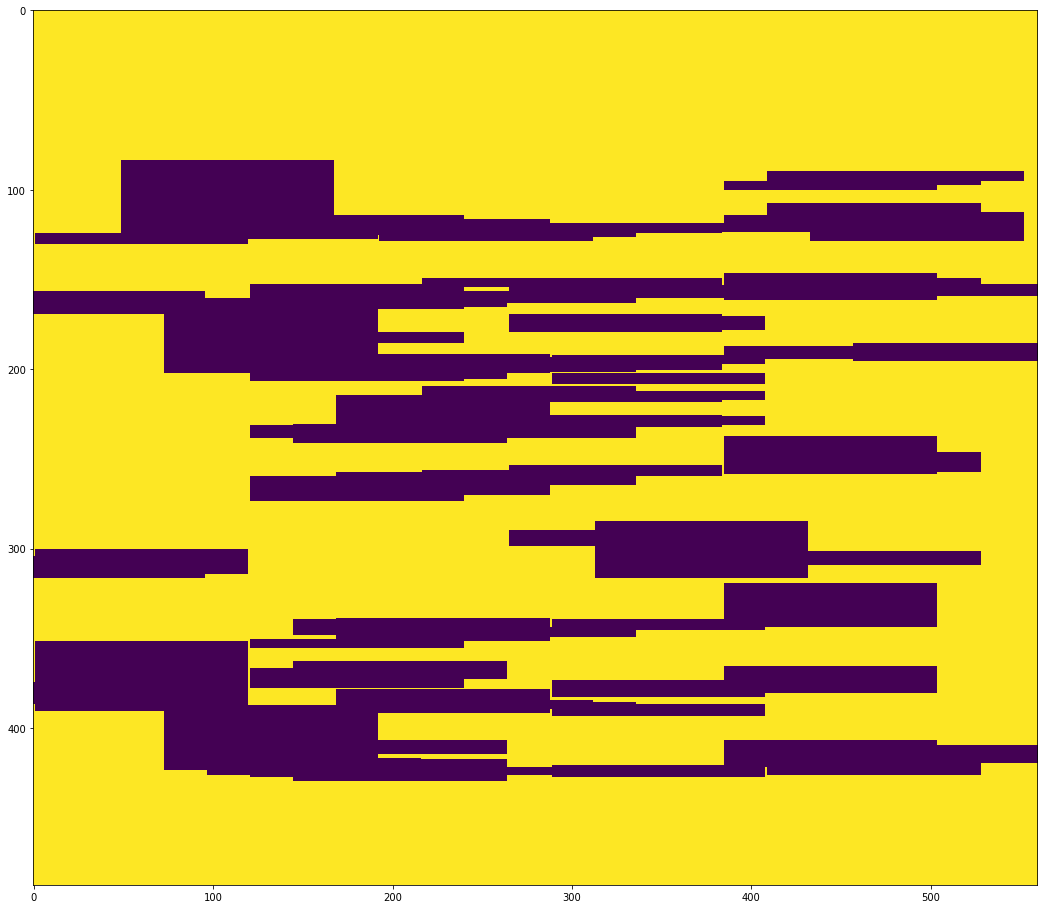

In [63]:
img = [];
for row in dilated_img:
    rows = [];
    for ele in row:
        if (ele == 255):
            rows.append(0);
        else:
            rows.append(255);
    img.append(rows);
img = np.array(img, dtype = np.uint8);
plt.imshow(img);

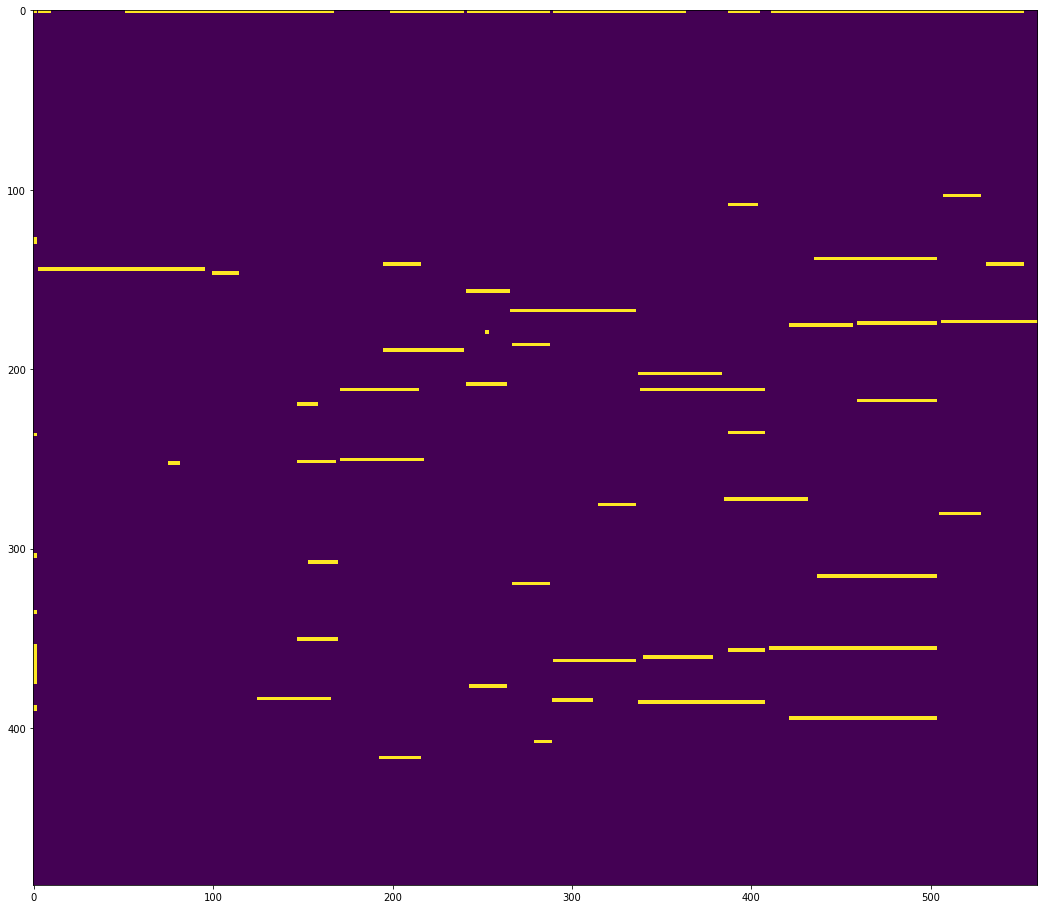

In [64]:
# Perform thinning
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
 
ret,img = cv.threshold(img,127,255,0)
element = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
done = False
 
while( not done):
    eroded = cv.erode(img,element)
    temp = cv.dilate(eroded,element)
    temp = cv.subtract(img,temp)
    skel = cv.bitwise_or(skel,temp)
    img = eroded.copy()
 
    zeros = size - cv.countNonZero(img)
    if zeros==size:
        done = True
skel = cv.morphologyEx(skel, cv.MORPH_OPEN, np.ones((2,2), np.uint8))
plt.imshow(skel)

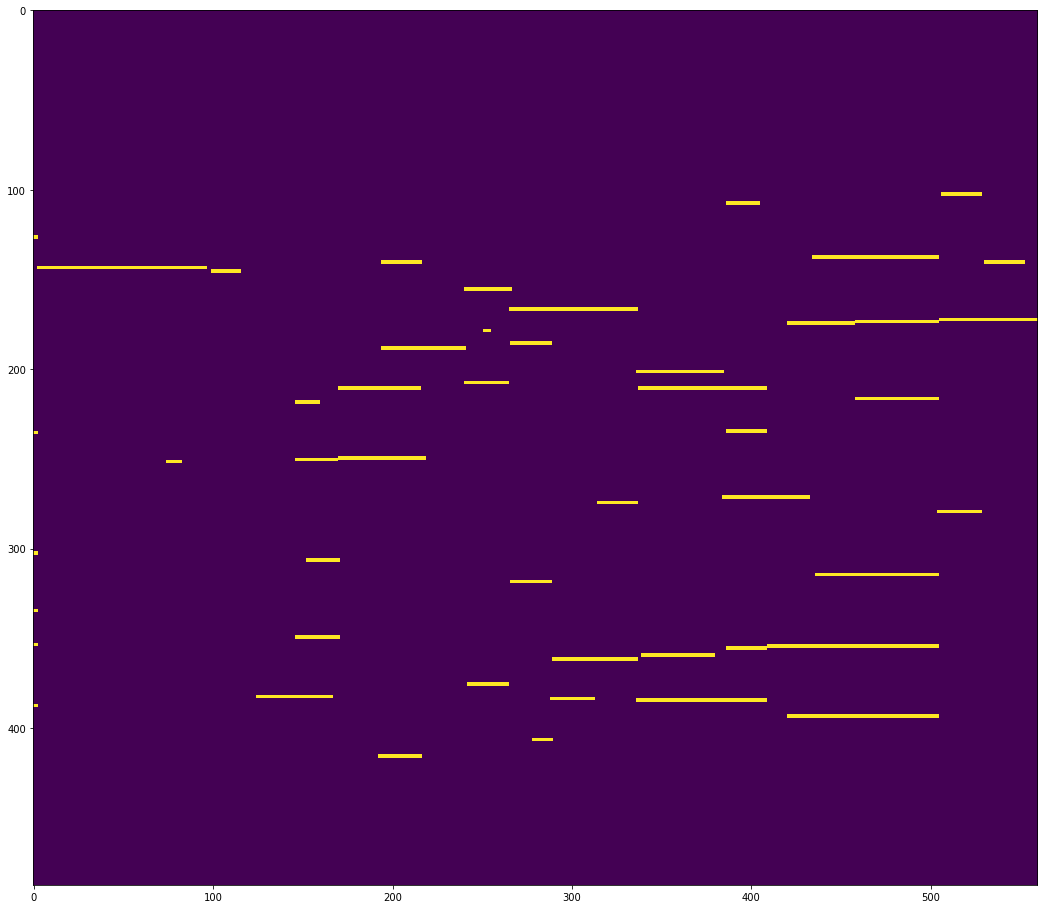

In [65]:
# Apply Sobel filter
sobel_img = cv.Sobel(skel,cv.CV_64F,0,1,ksize=3)
sobel_img = np.array(sobel_img, dtype = np.uint8);
ret, sobel_img = cv.threshold(sobel_img,200,255,cv.THRESH_BINARY)
plt.imshow(sobel_img)

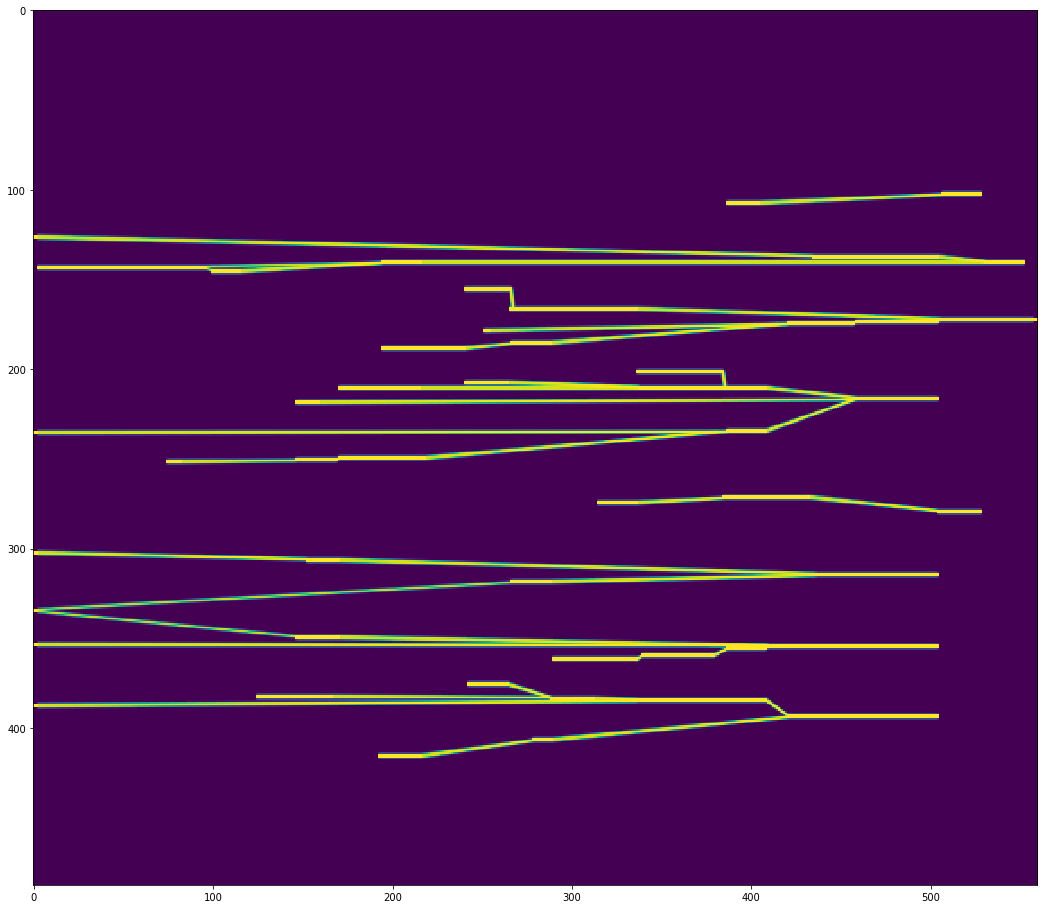

In [66]:
# find mean of white blocks join lines
constructed = constructLinesH(np.copy(sobel_img), strips, new_width, height)

In [55]:
# Extend lines

In [56]:
# Find components touching lines

In [57]:
# Check if component is greater than th (twice the avg height of components) then touching else overlapping

In [ ]:
cv.thinning(img,out,cv.ximgproc.THINNING_ZHANGSUEN)

In [40]:
def constructLinesH(image, strips, width, height):
    (h, w) = np.shape(image);
    dist = int (height);

    for i in range(1,h-1):
        for j in range(1,w-1):
            if lonelyH(image, i, j) >= 1:
                image = findLineH(image, i, j, dist);
    plt.imshow(image);

In [46]:
def lonelyH(image, i, j):
    (h, w) = np.shape(image);
    count = 0;
    if (image[i,j] == 255):
        if (i-1 > 0 and image[i-1, j] == 255 ):
            count+=1
        if (j+1 < w and image[i, j+1] == 255 ):
            count+=1
        if (j-1 > 0 and image[i, j-1] == 255 ):
            count+=1
        if (i+1 < h and image[i+1, j] == 255 ):
            count+=1
    return count;

def findLineH(image, i, j, dist):
    (h, w) = np.shape(image);

    for y in range(dist):
        k = i-y if i-y > 0 else 0
        for x in range(j+1,w):
            if (lonelyH(image, k, x) >= 1):
#                 print (str((i, j)) +  str((k, x)));
                cv.line(image, (j, i), (x, k), 255, 1, cv.LINE_AA)
                return image;
        k = i+y if i+y < h else h-1
        for x in range(j+1, w):
            if (lonelyH(image, k, x) >= 1):
#                 print (str((i, j)) +  str((k, x)));
                cv.line(image, (j, i), (x, k), 255, 1, cv.LINE_AA)
                return image;
#     other = findEnd(image, i, j);
#     ends = [j, other[1]];
#     ends.sort()
#     if (ends[0] < w/2 and ends[1] > w/2):
#         if (ends[0] == j):
#             cv.line(image, (0, i), (j, i), 255, 1, cv.LINE_AA)
#             cv.line(image, (w, other[0]), (other[1], other[0]), 255, 1, cv.LINE_AA)
#         else:
#             cv.line(image, (w, i), (j, i), 255, 1, cv.LINE_AA)
#             cv.line(image, (0, other[0]), (other[1], other[0]), 255, 1, cv.LINE_AA)
#         return image;
    return image;

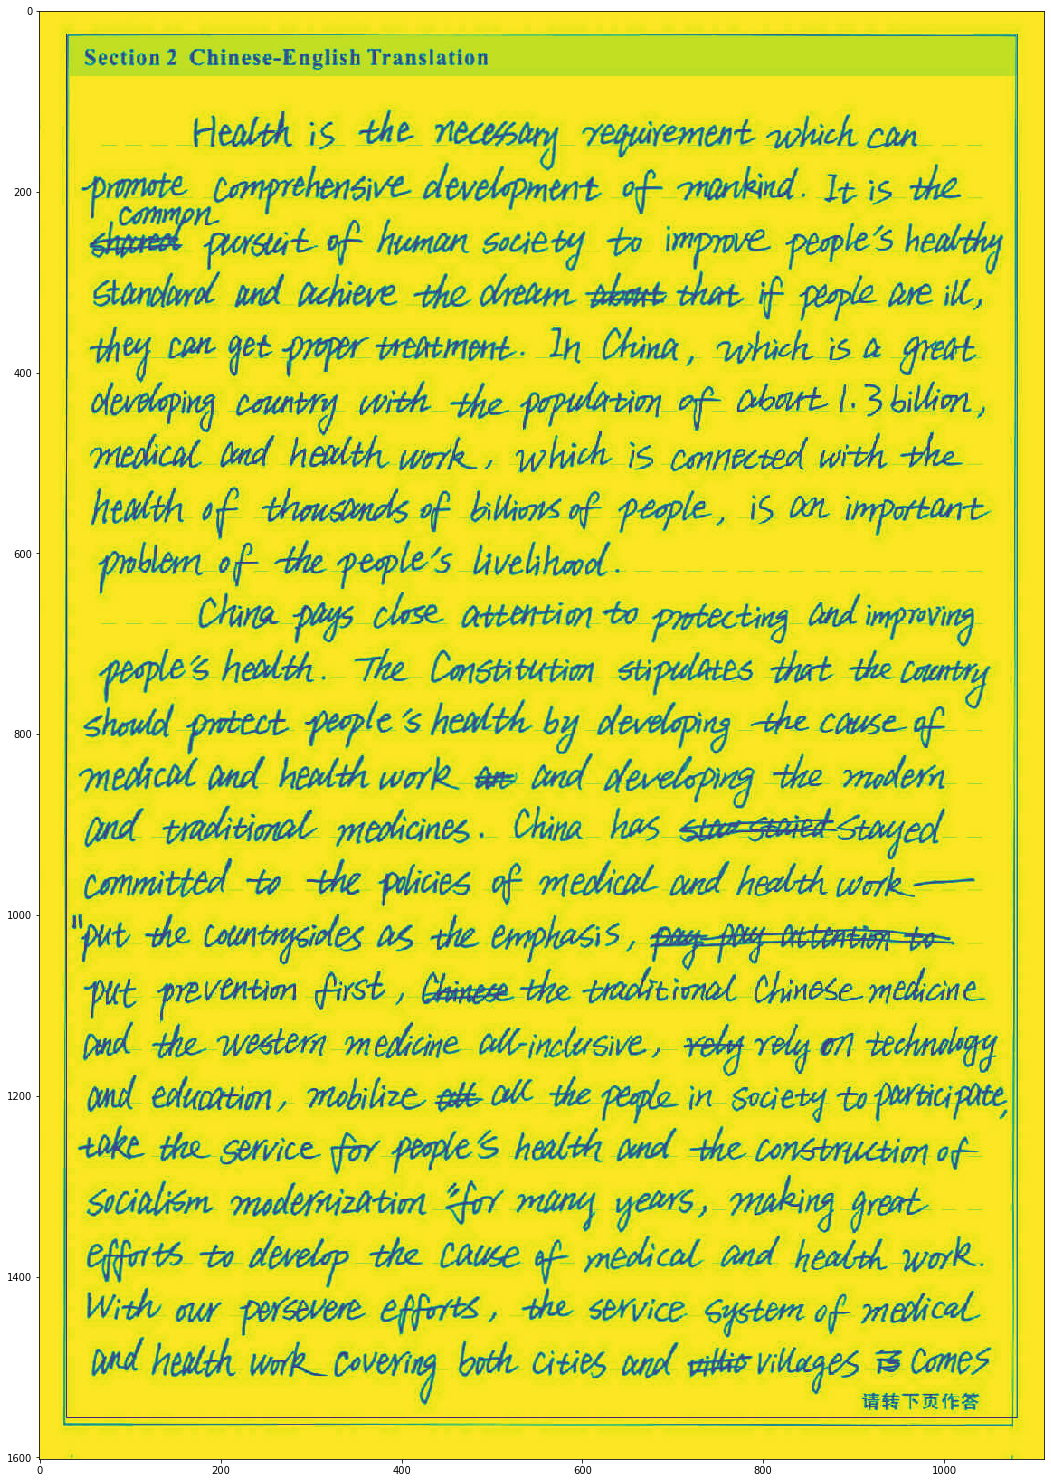

In [37]:
plt.imshow(image)

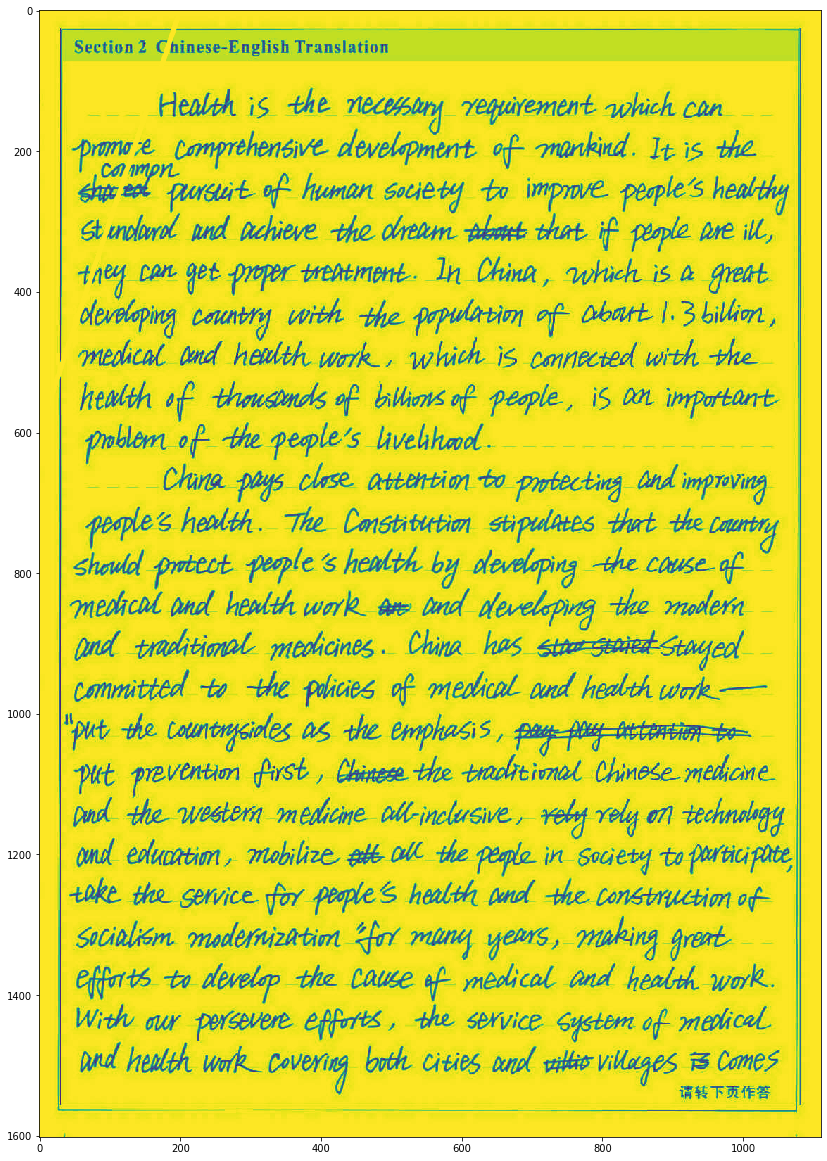

In [34]:
cv.line(image, (200,0),(0,600), 255, 5, cv.LINE_AA)
plt.imshow(image)

In [50]:
sobel_img[95, 38]

255

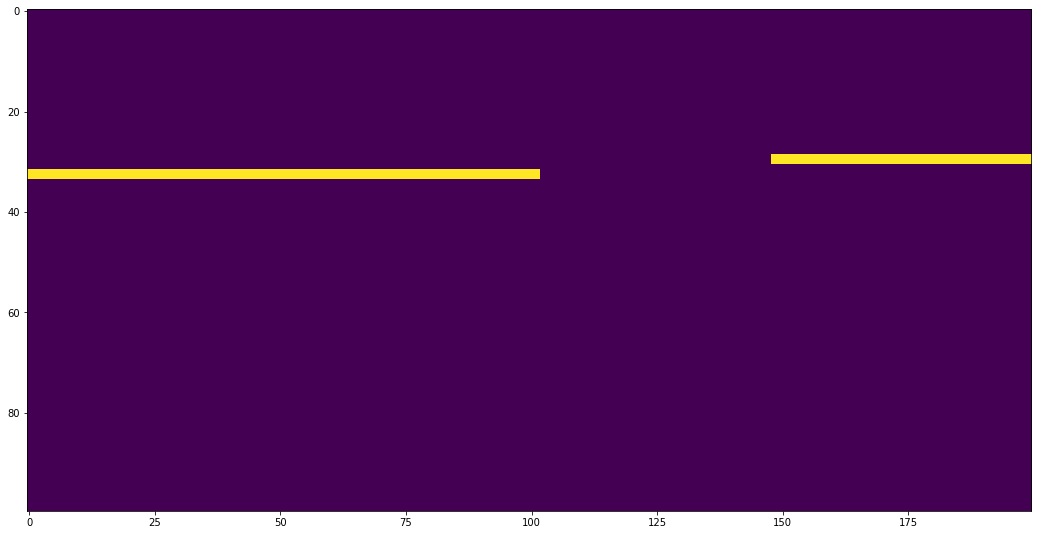

In [94]:
plt.imshow(sobel_img[1500:1600,200:400])

In [100]:
print (sobel_img[1530:1540,200:400])

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [79]:
lonelyH(sobel_img,1561,527)

3

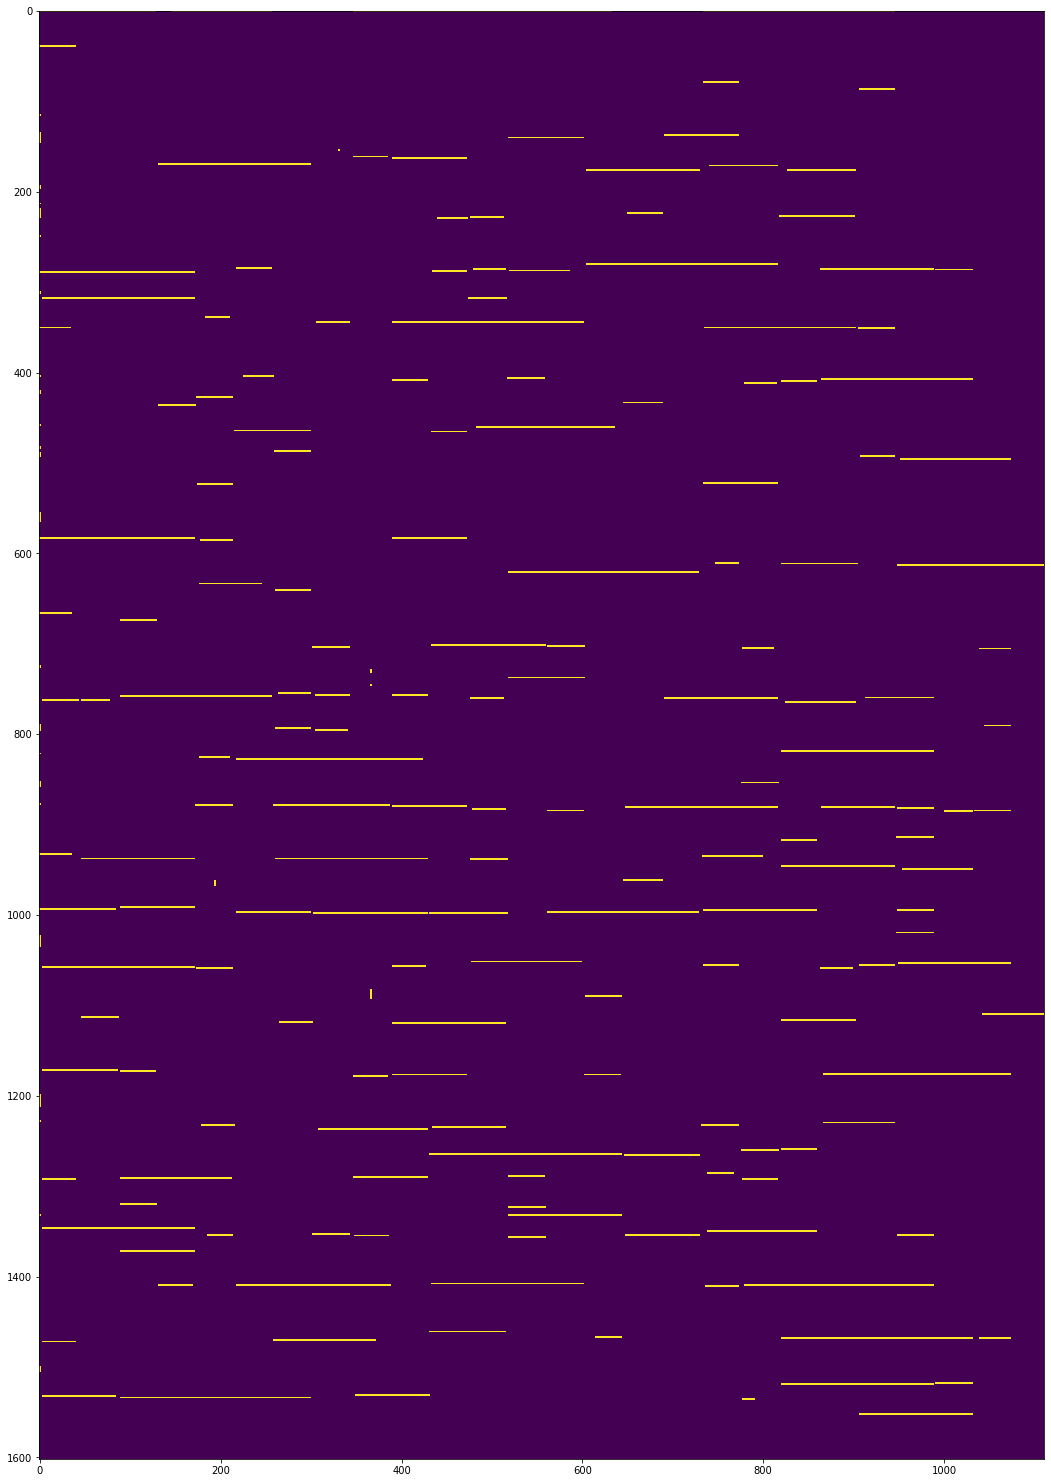

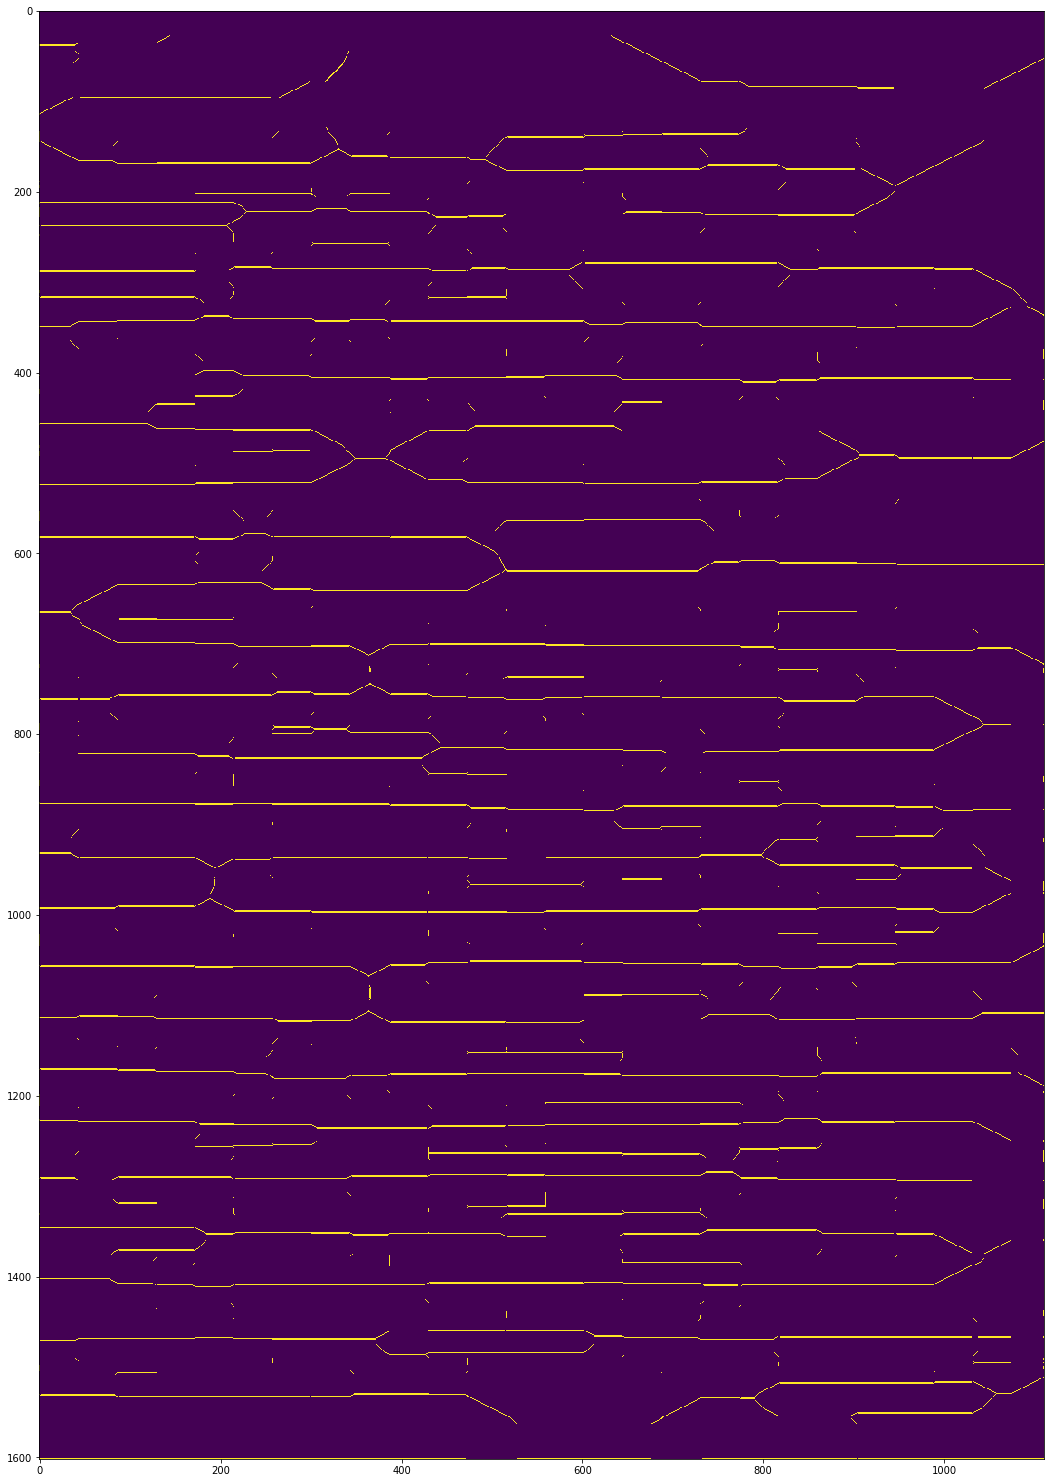

In [87]:
plt.imshow(cv.morphologyEx(skel, cv.MORPH_OPEN, np.ones((2,2), np.uint8)))
plt.show()
plt.imshow(skel)